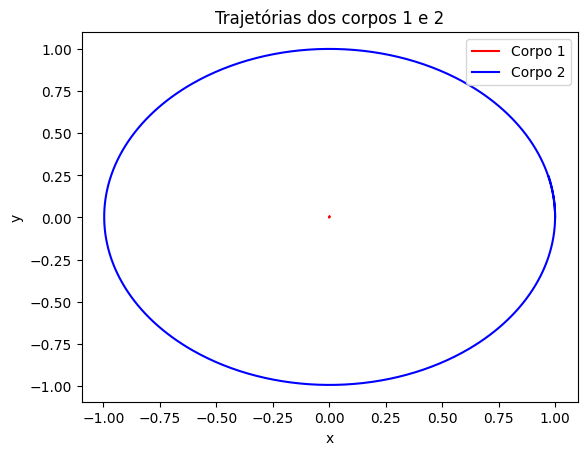

/tmp/ipython-input-3685217065.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


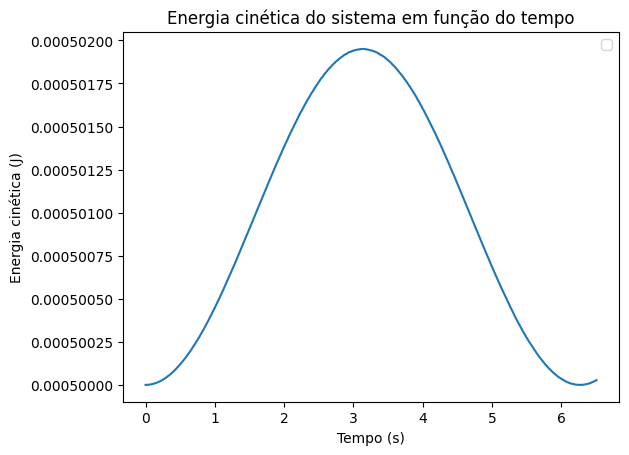

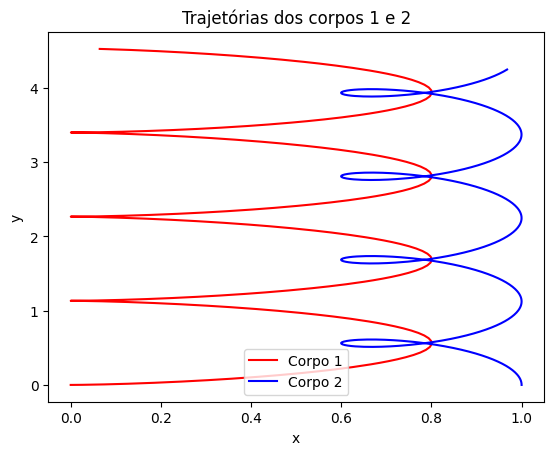

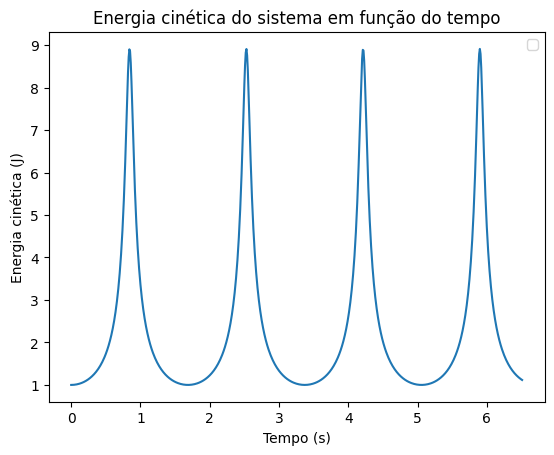

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo parâmetros do sistema

gamma = 1.0
m1 = 1.0
m2 = 0.001

# Definindo as condições iniciais

r1 = np.array([0.0,0.0])
r2 = np.array([1.0,0.0])

v1 = np.array([0.0,0.0])
v2 = np.array([0.0,1.0])

T = 6.5 # Tempo de simulação

dt = 0.01 # tamanho do intervalo temporal avançado em cada processo
tn = 0 # enésimo tempo

def calc_F12(r1,r2,m1,m2):
  """
  Calcula a força que 1 sofre devido 2
  """
  r12 = r2 - r1
  modr21 = np.linalg.norm(r12)
  return (gamma*(m1*m2)*r12)/(modr21**3)

def atualizar_dados(m1,m2,tn,r1,r2,v1,v2, file):
  """
  Atualiza os dados fazendo uma evolução do sistema a partir de condições inicias dadas
  """
  file.write("%lf %lf %lf %lf %lf %lf %lf %lf %lf \n" %(tn, r1[0], r1[1], v1[0], v1[1], r2[0], r2[1], v2[0], v2[1]))

  while (tn <= T): # Enquanto o tempo não superar o tempo total de simulação, a simulação continuará a rodar

    F12 = calc_F12(r1,r2,m1,m2) # Calcula a força que 1 sofre devido 2

    a10 = F12/m1 # Aceleração inicial do corpo de massa m1
    a20 = -F12/m2 # Aceleração inicial do corpo de massa m2

    # Atualizando as posições

    r1 = r1 + v1*dt + 0.5*a10*(dt)**2
    r2 = r2 + v2*dt + 0.5*a20*(dt)**2

    # Recalculando as forças

    F12 = calc_F12(r1,r2,m1,m2)

    # Calculando a nova aceleração

    a1 = F12/m1
    a2 = -F12/m2

    # Atualizando velocidades

    v1 = v1 + dt*(a10 + a1)*0.5
    v2 = v2 + dt*(a20 + a2)*0.5

    tn += dt # Incrementando o tempo

    # Salvando os dados no arquivo
    file.write("%lf %lf %lf %lf %lf %lf %lf %lf %lf \n" %(tn, r1[0], r1[1], v1[0], v1[1], r2[0], r2[1], v2[0], v2[1]))
  file.close()


def plotar_trajetorias(arquivo : str, m1 : float, m2 : float):
  dados = np.loadtxt(arquivo)
  plt.title('Trajetórias dos corpos 1 e 2')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(dados[:, 1], dados[:, 2], label = 'Corpo 1', color = 'red')
  plt.plot(dados[:,5], dados[:, 6], label = 'Corpo 2', color = 'blue')
  plt.legend()
  plt.show()

  plt.title("Energia cinética do sistema em função do tempo")
  plt.xlabel("Tempo (s)")
  plt.ylabel("Energia cinética (J)")
  plt.plot(dados[:, 0], ((dados[:, 3]**2 + dados[:, 4]**2)*(m1/2) + (dados[:, 7]**2 + dados[:, 8]**2)*(m2/2)))
  plt.legend()
  plt.show()

evolfile01 = open('evol01.txt', 'w+')
atualizar_dados(m1,m2,tn,r1,r2,v1,v2, evolfile01)
plotar_trajetorias('evol01.txt', m1,m2)

m2 = 2
evolfile02 = open('evol02.txt', 'w+')
atualizar_dados(m1,m2,tn,r1,r2,v1,v2, evolfile02)
plotar_trajetorias('evol02.txt', m1,m2)